In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA
df1 = pd.read_csv('/content/File_1.csv')
df2 = pd.read_csv('/content/File_2.csv')

In [5]:
# Now make only 1 data frame of two CSV files using the join operation
joined_df = df1.join(df2.set_index('Movie Name'), on='Movie Name')

# EDA

In [6]:

print(joined_df.shape)

(1837, 11)


In [7]:
print(joined_df.columns)

Index(['Serial No.', 'Movie Name', 'Year', 'Director', 'Duration', 'Ratings',
       'Metascore', 'Gross collection', 'Stars', 'Genre', 'Votes'],
      dtype='object')


In [8]:
print(joined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1768
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        1837 non-null   object 
 1   Movie Name        1837 non-null   object 
 2   Year              1837 non-null   object 
 3   Director          1837 non-null   object 
 4   Duration          1837 non-null   object 
 5   Ratings           1837 non-null   float64
 6   Metascore         1837 non-null   object 
 7   Gross collection  1837 non-null   object 
 8   Stars             1837 non-null   object 
 9   Genre             1837 non-null   object 
 10  Votes             1837 non-null   object 
dtypes: float64(1), object(10)
memory usage: 172.2+ KB
None


The DataFrame contains a total of 1837 rows, indicating that there are 1837 movies in the dataset.

The columns "Serial No.", "Movie Name", "Year", "Director", "Duration", "Ratings", "Metascore", "Gross collection", "Stars", "Genre", and "Votes" are all present in the DataFrame.

The data types of the columns are mostly object (string) except for the "Ratings" column, which is of data type float64. It is important to note that some columns that typically represent numerical data, such as "Year", "Duration", "Metascore", "Gross collection", "Stars", and "Votes", are stored as objects. This suggests that these columns may contain non-numeric characters or missing values.

The presence of non-null values in all columns (1837 non-null) indicates that there are no missing values in the DataFrame. However, this might be misleading, as some columns with object data type could have missing values represented as empty strings or other non-numeric values.

The "Ratings" column is of data type float64, suggesting that it contains numerical ratings for the movies.



In [9]:
# Data Cleaning and Preprocessing
# Convert data types of relevant columns to numeric
joined_df['Year'] = joined_df['Year'].replace(r'[^\d]', '', regex=True).astype(int)
joined_df['Duration'] = joined_df['Duration'].str.replace(' min', '').astype(int)
joined_df['Metascore'] = joined_df['Metascore'].replace('-', 0).astype(int)
joined_df['Votes'] = joined_df['Votes'].str.replace(',', '').astype(int)

In [10]:
joined_df['Gross collection'] = joined_df['Gross collection'].replace('[\$,M]', '', regex=True)
joined_df['Gross collection'] = pd.to_numeric(joined_df['Gross collection'], errors='coerce')

In [11]:
print(joined_df.info())      # Summary information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1768
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        1837 non-null   object 
 1   Movie Name        1837 non-null   object 
 2   Year              1837 non-null   int64  
 3   Director          1837 non-null   object 
 4   Duration          1837 non-null   int64  
 5   Ratings           1837 non-null   float64
 6   Metascore         1837 non-null   int64  
 7   Gross collection  1538 non-null   float64
 8   Stars             1837 non-null   object 
 9   Genre             1837 non-null   object 
 10  Votes             1837 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 172.2+ KB
None


The dataset contains information related to movies, featuring a total of 1837 entries and 11 columns. These columns provide insights into different aspects of the movies:

The "Serial No." column serves as a unique identifier for each movie entry, ensuring a distinction between them.

"Movie Name" includes the titles of the movies, offering a quick reference to their names.

"Year" represents the release year of each movie, helping to understand the timeline of the dataset.

"Director" specifies the names of the directors who were responsible for creating the movies.

"Duration" indicates the runtime of the movies in minutes, giving an idea of their length.

"Ratings" reflect the assigned ratings for the movies, possibly based on factors like reviews or critic evaluations.

"Metascore" provides an additional movie rating in the form of a metascore, contributing to the overall assessment.

"Gross collection" reveals the earnings or revenue generated by the movies, although some values appear to be missing.

"Stars" offers information about the notable actors or stars who featured in the movies.

"Genre" classifies the movies into different genres or categories, aiding in genre-based analysis.

"Votes" represents the number of votes that each movie received, serving as an indicator of its popularity or engagement.

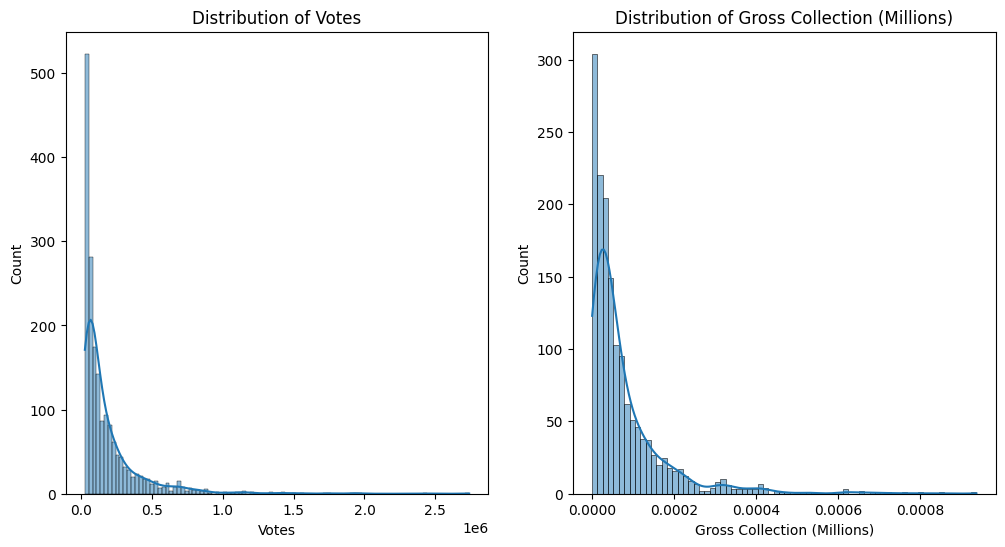

In [12]:
# Data Visualization
# Distribution of Votes and Gross Collection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(joined_df['Votes'], kde=True)
plt.title('Distribution of Votes')
plt.subplot(1, 2, 2)
sns.histplot(joined_df['Gross collection'] / 1e6, kde=True)  # Dividing by 1 million for easier visualization
plt.title('Distribution of Gross Collection (Millions)')
plt.xlabel('Gross Collection (Millions)')

plt.show()

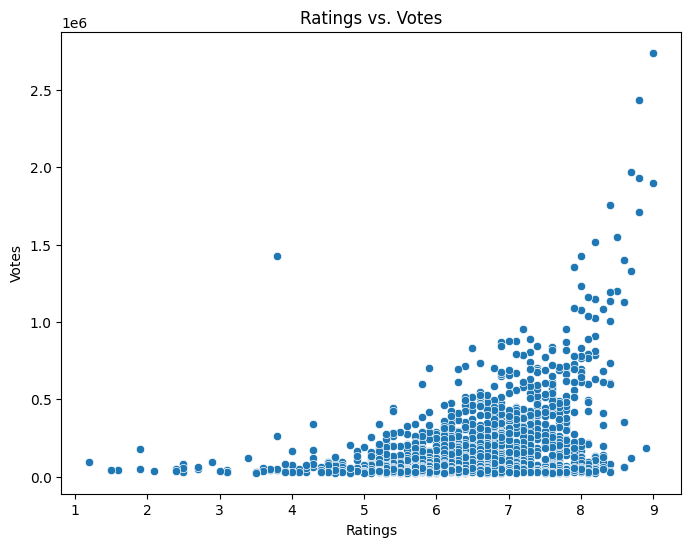

In [13]:

# Scatter plot of Ratings vs. Votes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Votes', data=joined_df)
plt.title('Ratings vs. Votes')
plt.show()


The scatter plot shows a positive correlation between "Ratings" and "Votes," implying that movies with higher ratings tend to receive a higher number of votes. This suggests that audiences are more likely to engage with movies that have better ratings, potentially due to their perceived quality or popularity.

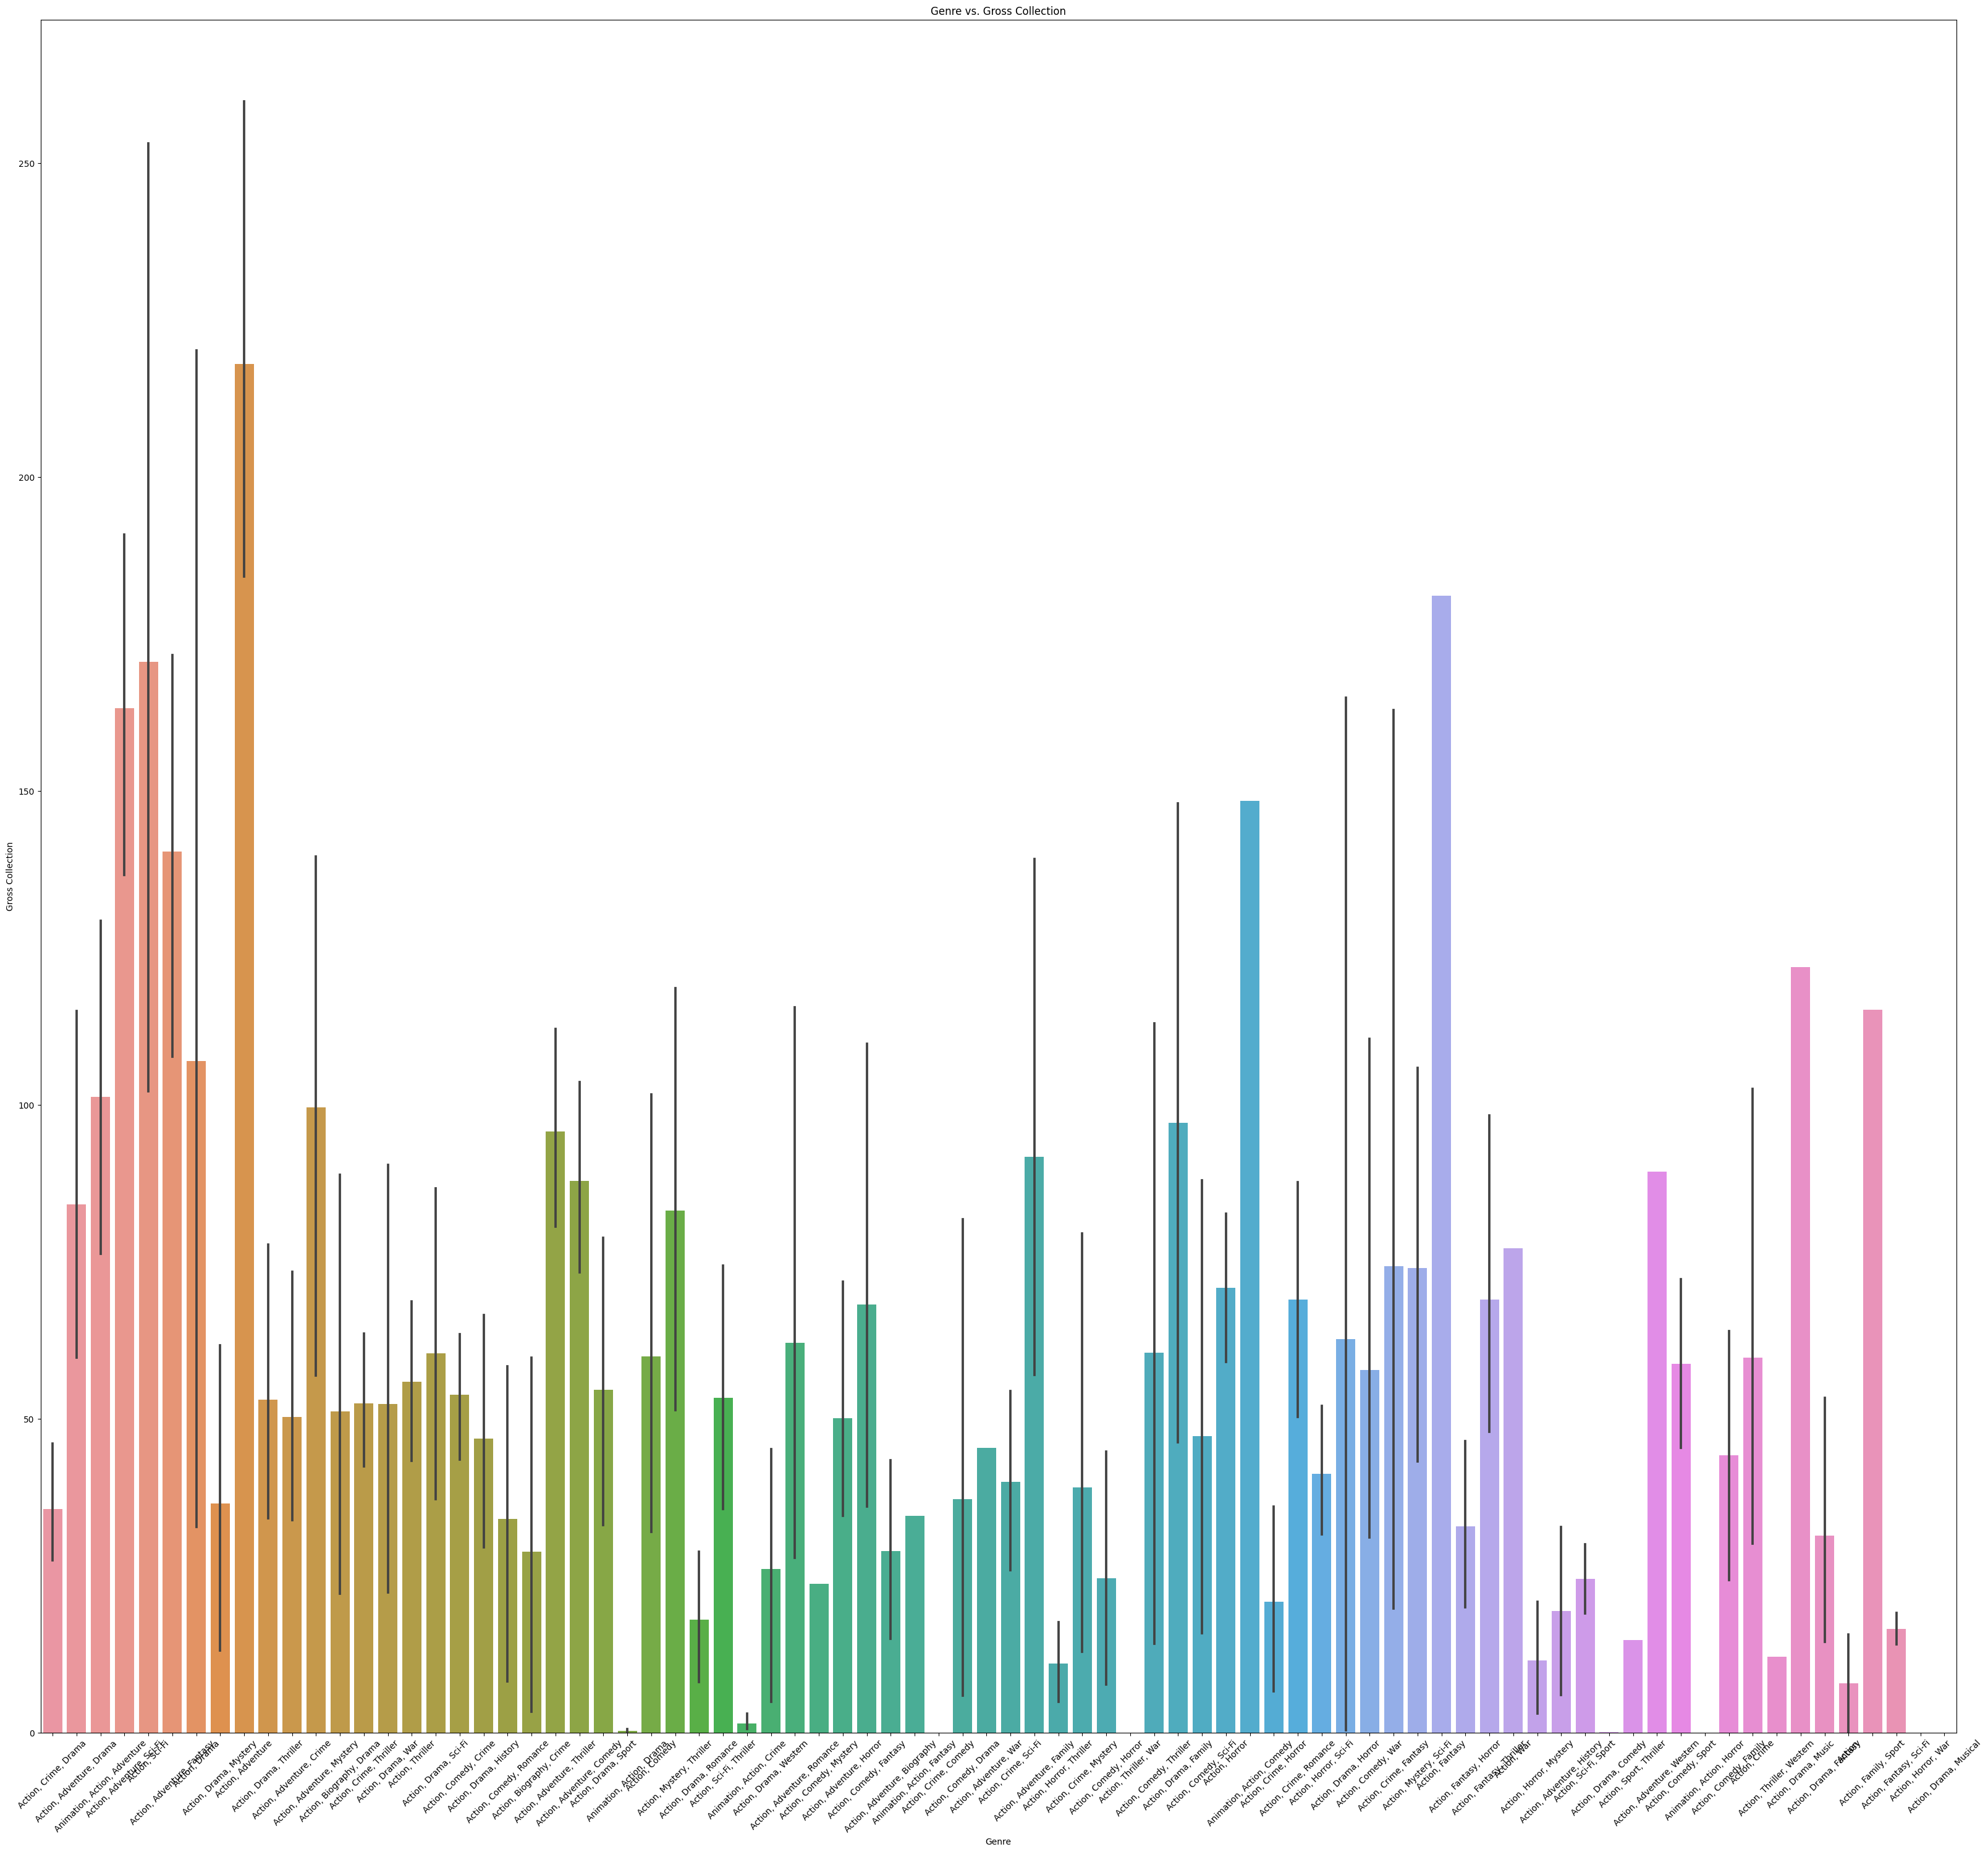

In [14]:
# Bar chart of Genre vs. Gross Collection
plt.figure(figsize=(40, 36))
sns.barplot(x='Genre', y='Gross collection', data=joined_df)
plt.title('Genre vs. Gross Collection')
plt.xlabel('Genre')
plt.ylabel('Gross Collection')
plt.xticks(rotation=45)
plt.show()

the bar chart depicting "Genre vs. Gross Collection" offers a clear and visually intuitive way to understand how different movie genres are associated with their respective earnings. It can help stakeholders in the film industry make informed decisions and allocate resources effectively based on genre preferences and financial expectations.

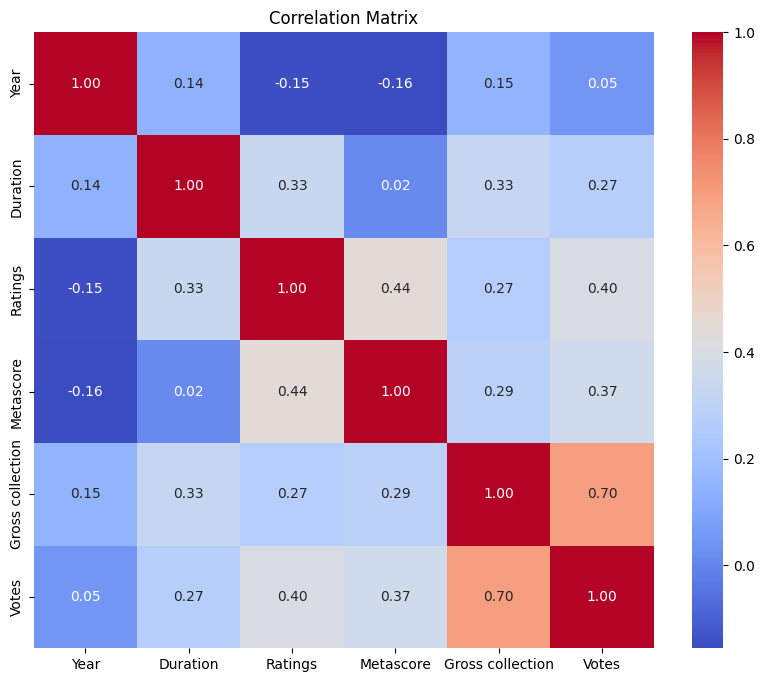

In [15]:
# Correlation Analysis
correlation_matrix = joined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

the correlation heatmap offers a visual summary of the relationships between numeric variables in the dataset. It highlights potential patterns and associations that can be further explored and considered in subsequent analysis and modeling tasks.

In [16]:
print(joined_df.isnull().sum())

Serial No.            0
Movie Name            0
Year                  0
Director              0
Duration              0
Ratings               0
Metascore             0
Gross collection    299
Stars                 0
Genre                 0
Votes                 0
dtype: int64


The output displays the count of missing values in each column of the dataset.

In [17]:
mean_gross_collection = joined_df['Gross collection'].mean()
joined_df['Gross collection'].fillna(mean_gross_collection, inplace=True)

By filling in the missing values with the mean of the "Gross collection" column, the code aims to provide a way to handle the missing data and make the dataset more suitable for analysis or modeling.

In [18]:
print(joined_df.isnull().sum())

Serial No.          0
Movie Name          0
Year                0
Director            0
Duration            0
Ratings             0
Metascore           0
Gross collection    0
Stars               0
Genre               0
Votes               0
dtype: int64


the dataset appears to be complete, with no missing values in any of the columns. This is a positive indication as it simplifies the data preprocessing process and ensures that all necessary information is available for analysis and modeling.

In [19]:
print(joined_df.describe())

              Year     Duration      Ratings    Metascore  Gross collection  \
count  1837.000000  1837.000000  1837.000000  1837.000000       1837.000000   
mean   2006.076211   115.281437     6.471693    47.682635         76.791040   
std      13.336220    21.594847     1.000579    22.431814         93.712417   
min    1924.000000    45.000000     1.200000     0.000000          0.000000   
25%    2000.000000   100.000000     5.900000    37.000000         22.370000   
50%    2009.000000   111.000000     6.500000    50.000000         56.620000   
75%    2016.000000   126.000000     7.100000    63.000000         78.870000   
max    2023.000000   321.000000     9.000000    98.000000        936.660000   

              Votes  
count  1.837000e+03  
mean   1.809043e+05  
std    2.361610e+05  
min    2.500600e+04  
25%    4.748700e+04  
50%    9.636600e+04  
75%    2.144010e+05  
max    2.739626e+06  


These statistics provide a summary of the central tendency, spread, and range of each numeric column in the dataset. They offer insights into the distribution and characteristics of the data, which can be valuable for understanding and analyzing the dataset before building predictive models.

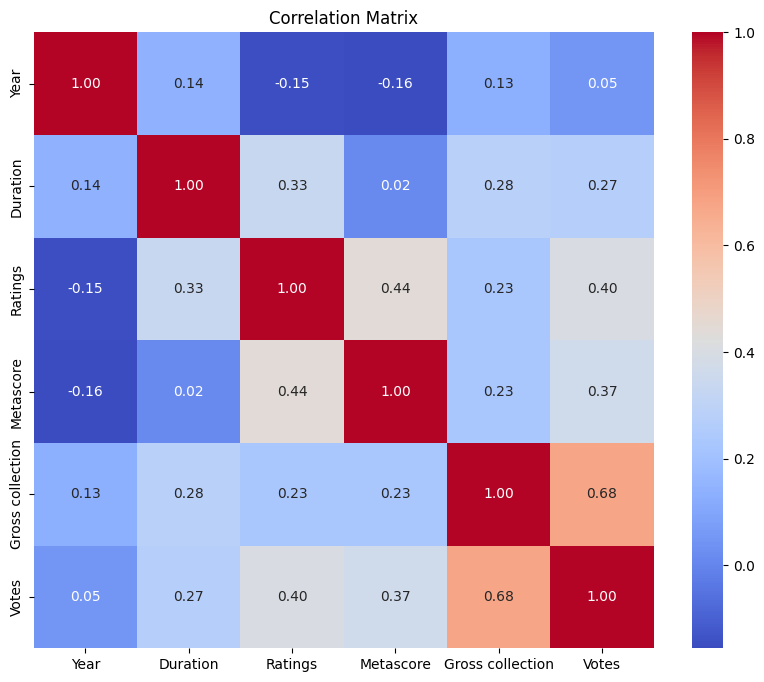

In [20]:
# Correlation Analysis
correlation_matrix = joined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: >

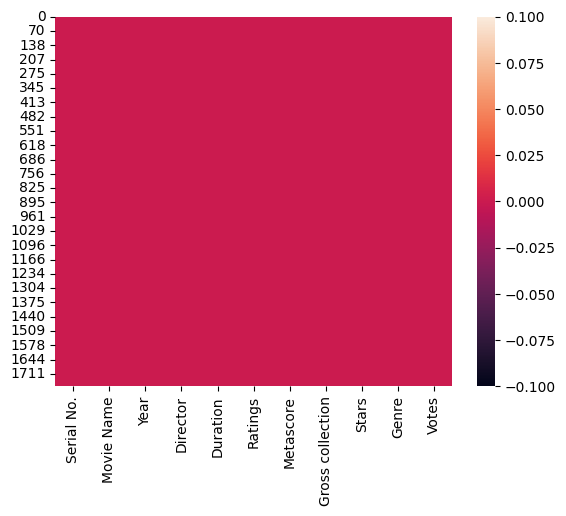

In [21]:
sns.heatmap(joined_df.isnull())

dataset has no missing values if there are missing values it would be in different colors

In [22]:
joined_df

,Serial No.,Movie Name,Year,Director,Duration,Ratings,Metascore,Gross collection,Stars,Genre,Votes
0,1.,The Dark Knight,2008,"['Christopher Nolan', 'Christian Bale', 'Heath...",152,9.0,84,534.86000,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","Action, Crime, Drama",2739626
1,2.,The Lord of the Rings: The Return of the King,2003,"['Peter Jackson', 'Elijah Wood', 'Viggo Morten...",201,9.0,94,377.85000,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...","Action, Adventure, Drama",1898292
2,3.,Spider-Man: Across the Spider-Verse,2023,"['Joaquim Dos Santos', 'Kemp Powers', 'Justin ...",140,8.9,86,76.79104,"['Kemp Powers', 'Justin K. Thompson', 'Shameik...","Animation, Action, Adventure",183192
3,4.,Inception,2010,"['Christopher Nolan', 'Leonardo DiCaprio', 'Jo...",148,8.8,74,292.58000,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...","Action, Adventure, Sci-Fi",2431118
4,5.,The Lord of the Rings: The Fellowship of the Ring,2001,"['Peter Jackson', 'Elijah Wood', 'Ian McKellen...",178,8.8,92,315.54000,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...","Action, Adventure, Drama",1926722
...,...,...,...,...,...,...,...,...,...,...,...
1764,"1,765.",Radhe,2021,"['Prabhu Deva', 'Salman Khan', 'Disha Patani',...",109,1.9,0,76.79104,"['Salman Khan', 'Disha Patani', 'Randeep Hooda...","Action, Crime, Thriller",179047
1765,"1,766.",Race 3,2018,"[""Remo D'Souza"", 'Anil Kapoor', 'Salman Khan',...",160,1.9,0,1.69000,"['Anil Kapoor', 'Salman Khan', 'Bobby Deol', '...","Action, Crime, Thriller",47806
1766,"1,767.",Angels Apocalypse,2015,"['Sean Cain', 'Enzo Zelocchi', 'Enzo Zelocchi'...",85,1.6,0,76.79104,"['Enzo Zelocchi', 'Enzo Zelocchi', 'Jana Roche...","Action, Fantasy, Sci-Fi",42919
1767,"1,768.",The Cost of Deception,2021,"['Keith English', 'Vivianne Bánovits', 'András...",125,1.5,0,76.79104,"['Vivianne Bánovits', 'András Mózes', 'Barna B...","Action, Crime, Drama",39598


In [23]:
# Separate numerical and categorical columns
numerical_columns = joined_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = joined_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Year', 'Duration', 'Ratings', 'Metascore', 'Gross collection', 'Votes']
Categorical Columns: ['Serial No.', 'Movie Name', 'Director', 'Stars', 'Genre']


Outliers in 'Duration': [1, 4, 5, 11, 19, 26, 32, 33, 35, 46, 47, 51, 52, 78, 80, 102, 105, 107, 128, 130, 137, 186, 200, 232, 240, 264, 268, 284, 285, 371, 373, 390, 391, 440, 482, 486, 489, 491, 547, 556, 558, 623, 717, 1018, 1081, 1209, 1311, 1493, 1511, 1596, 1682, 1691, 1754]
Outliers in 'Ratings': [0, 1, 2, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768]
Outliers in 'Metascore': []
Outliers in 'Gross collection': [0, 1, 3, 4, 5, 6, 7, 9, 10, 14, 16, 17, 19, 21, 22, 25, 27, 36, 37, 38, 39, 58, 63, 66, 83, 84, 85, 86, 87, 88, 91, 106, 108, 109, 112, 113, 130, 132, 135, 139, 141, 142, 143, 145, 148, 150, 153, 165, 172, 174, 177, 200, 201, 202, 204, 212, 213, 214, 215, 220, 221, 227, 249, 250, 251, 255, 258, 288, 289, 291, 293, 294, 297, 298, 299, 301, 306, 312, 324, 326, 329, 330, 331, 333, 338

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Duration'),
  Text(1, 0, 'Ratings'),
  Text(2, 0, 'Metascore'),
  Text(3, 0, 'Gross collection'),
  Text(4, 0, 'Votes'),
  Text(5, 0, 'Year')])

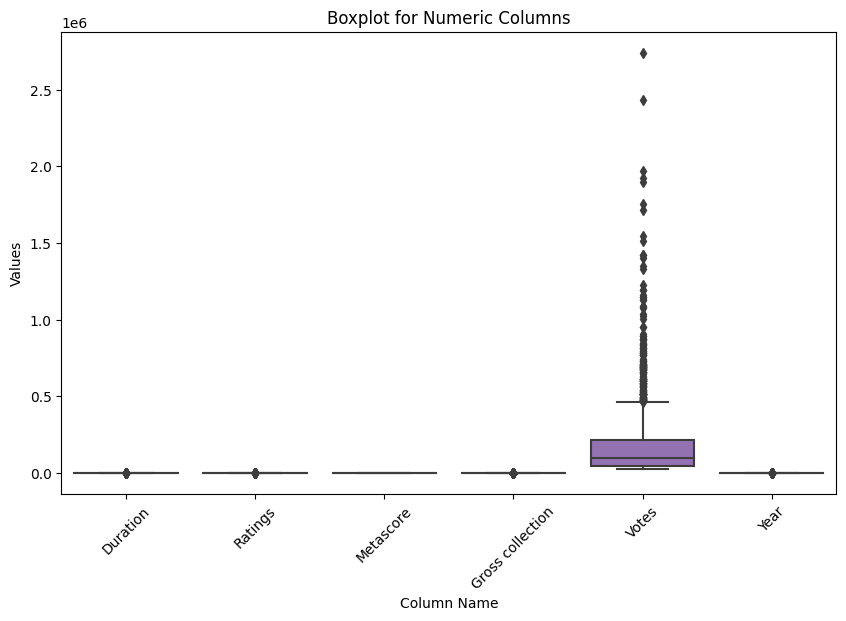

In [ ]:
# Check for outliers using the IQR method
numeric_columns = ['Duration', 'Ratings', 'Metascore', 'Gross collection','Votes','Year']

for col in numeric_columns:
    q1 = joined_df[col].quantile(0.25)
    q3 = joined_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = joined_df[(joined_df[col] < lower_bound) | (joined_df[col] > upper_bound)]
    print(f"Outliers in '{col}': {outliers.index.tolist()}")

# Data Visualization (Boxplots to visualize outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=joined_df[numeric_columns], orient='v')
plt.title('Boxplot for Numeric Columns')
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.xticks(rotation=45)

This code performs outlier detection using the IQR (Interquartile Range) method for each numeric column in the dataset. It calculates the lower and upper bounds for potential outliers based on the 1.5 * IQR rule and then identifies and prints the indices of outliers for each column. Finally, it visualizes the distribution of the numeric columns using boxplots.

In [ ]:
outliers.shape

(68, 11)

In [ ]:
joined_df.shape

(1837, 11)

In [ ]:
outliers_1.shape

(1837,)

In [28]:
# Select only the numeric columns (excluding the target variables)
from scipy.stats import zscore
numeric_columns_1 = ['Year', 'Duration', 'Ratings', 'Metascore']
numeric_features = joined_df[numeric_columns_1]

# Detect and handle outliers using Z-score method
z_scores = np.abs(zscore(numeric_features))
threshold = 3
outliers_mask = (z_scores > threshold).any(axis=1)

# Filter out rows without outliers
filtered_df = joined_df[~outliers_mask]

# Check the shape of the filtered dataset
print(filtered_df.shape)  # Should be (1837, 11)

(1777, 11)


This code performs outlier detection using the Z-score method for each numeric column in the dataset. It calculates the Z-scores for each data point in the numeric columns and identifies outliers based on a Z-score threshold of 3. Any data point with an absolute Z-score greater than 3 is considered an outlier. The code then prints the indices of outliers for each column and provides a boxplot visualization of the numeric columns to visualize the distribution and identify potential outliers.

In [24]:
from sklearn.preprocessing import LabelEncoder

# Feature Selection for 'Gross collection'
features_gross_collection = joined_df[['Year', 'Duration', 'Ratings', 'Metascore', 'Stars', 'Genre','Serial No.', 'Movie Name', 'Director', 'Votes']]
target_gross_collection = joined_df['Gross collection']

# Drop unnecessary columns for 'Gross collection'
features_gross_collection.drop(['Serial No.', 'Movie Name', 'Director', 'Votes'], axis=1, inplace=True)

# Label Encoding for 'Stars' and 'Genre' columns
label_encoder = LabelEncoder()
features_gross_collection['Stars'] = label_encoder.fit_transform(features_gross_collection['Stars'])
features_gross_collection['Genre'] = label_encoder.fit_transform(features_gross_collection['Genre'])


# Feature Selection for 'Votes'
features_votes = joined_df[['Year', 'Duration', 'Ratings', 'Metascore', 'Gross collection', 'Stars', 'Genre','Serial No.', 'Movie Name', 'Director']]
target_votes = joined_df['Votes']

# Drop unnecessary columns for 'Votes'
features_votes.drop(['Serial No.', 'Movie Name', 'Director'], axis=1, inplace=True)

# Label Encoding for 'Stars' and 'Genre' columns
label_encoder = LabelEncoder()
features_votes['Stars'] = label_encoder.fit_transform(features_votes['Stars'])
features_votes['Genre'] = label_encoder.fit_transform(features_votes['Genre'])

In [29]:
# Statistical summary for 'Gross collection' features
stat_summary_gross_collection = features_gross_collection.describe()

# Statistical summary for 'Votes' features
stat_summary_votes = features_votes.describe()

print("Statistical Summary for 'Gross collection' Features:")
print(stat_summary_gross_collection)

print("\nStatistical Summary for 'Votes' Features:")
print(stat_summary_votes)

Statistical Summary for 'Gross collection' Features:
              Year     Duration      Ratings    Metascore        Stars  \
count  1837.000000  1837.000000  1837.000000  1837.000000  1837.000000   
mean   2006.076211   115.281437     6.471693    47.682635   875.746326   
std      13.336220    21.594847     1.000579    22.431814   505.313608   
min    1924.000000    45.000000     1.200000     0.000000     0.000000   
25%    2000.000000   100.000000     5.900000    37.000000   436.000000   
50%    2009.000000   111.000000     6.500000    50.000000   879.000000   
75%    2016.000000   126.000000     7.100000    63.000000  1312.000000   
max    2023.000000   321.000000     9.000000    98.000000  1748.000000   

             Genre  
count  1837.000000  
mean     29.243876  
std      22.136100  
min       0.000000  
25%      11.000000  
50%      23.000000  
75%      43.000000  
max      79.000000  

Statistical Summary for 'Votes' Features:
              Year     Duration      Ratings    

This code calculates and displays the statistical summary for the selected features related to 'Gross collection' and 'Votes'.

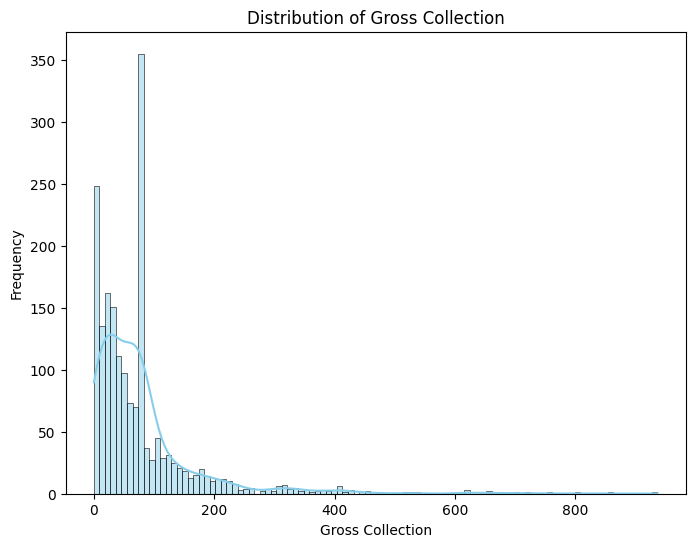

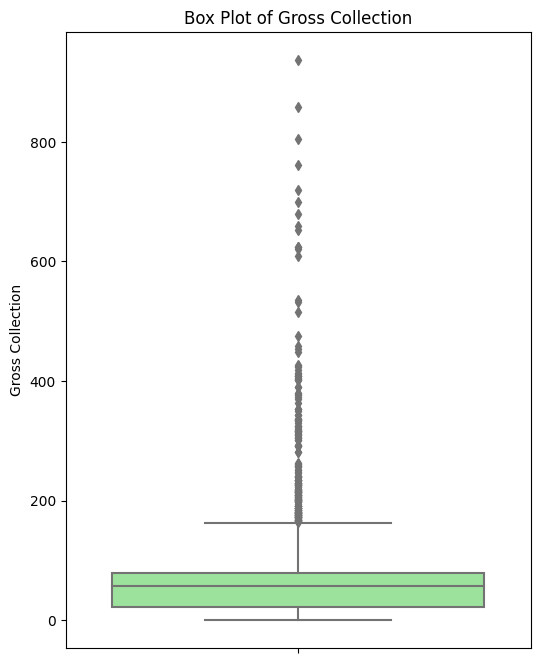

Statistical Summary for 'Gross collection':
count    1837.000000
mean       76.791040
std        93.712417
min         0.000000
25%        22.370000
50%        56.620000
75%        78.870000
max       936.660000
Name: Gross collection, dtype: float64


In [30]:
# Univariate Analysis for 'Gross collection'
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(joined_df['Gross collection'], kde=True, color='skyblue')
plt.title('Distribution of Gross Collection')
plt.xlabel('Gross Collection')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=joined_df['Gross collection'], color='lightgreen')
plt.title('Box Plot of Gross Collection')
plt.ylabel('Gross Collection')
plt.show()

# Summary Statistics
stat_summary_gross_collection = joined_df['Gross collection'].describe()
print("Statistical Summary for 'Gross collection':")
print(stat_summary_gross_collection)

these visualizations and summary statistics help in understanding the distribution, central tendencies, and presence of outliers in the 'Gross collection' variable, which are crucial considerations for modeling and analysis.

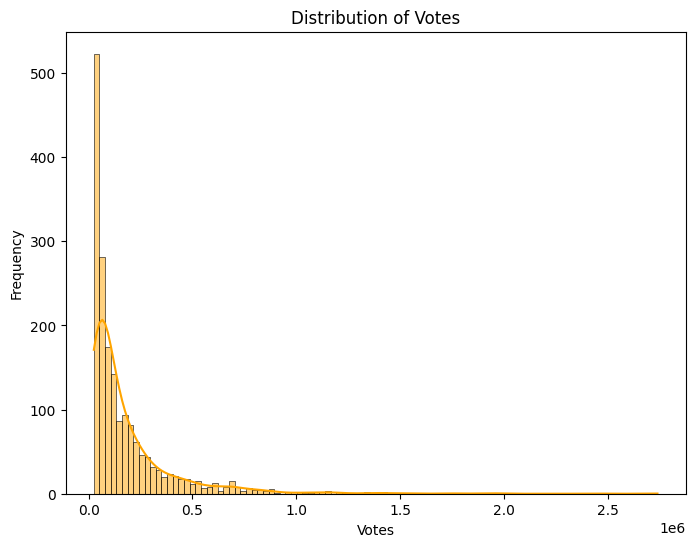

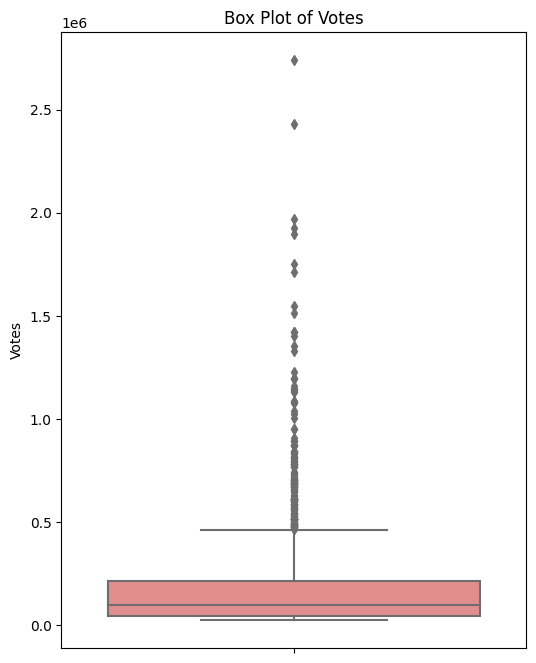

Statistical Summary for 'Votes':
count    1.837000e+03
mean     1.809043e+05
std      2.361610e+05
min      2.500600e+04
25%      4.748700e+04
50%      9.636600e+04
75%      2.144010e+05
max      2.739626e+06
Name: Votes, dtype: float64


In [31]:
# Univariate Analysis for 'Votes'
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(joined_df['Votes'], kde=True, color='orange')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=joined_df['Votes'], color='lightcoral')
plt.title('Box Plot of Votes')
plt.ylabel('Votes')
plt.show()

# Summary Statistics
stat_summary_votes = joined_df['Votes'].describe()
print("Statistical Summary for 'Votes':")
print(stat_summary_votes)

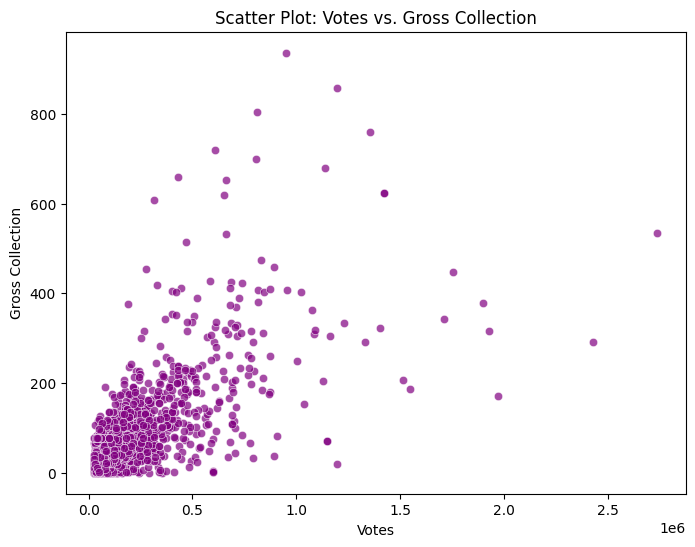

<Figure size 800x600 with 0 Axes>

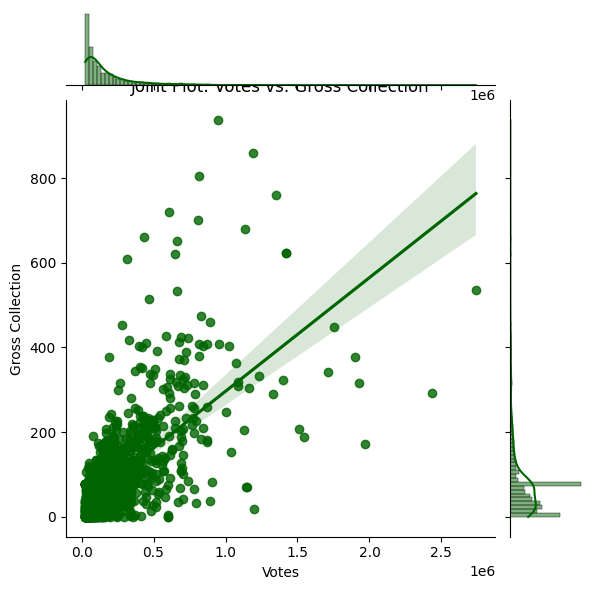

In [32]:
# Bivariate Analysis for 'Votes' and 'Gross collection'
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Gross collection', data=joined_df, color='purple', alpha=0.7)
plt.title('Scatter Plot: Votes vs. Gross Collection')
plt.xlabel('Votes')
plt.ylabel('Gross Collection')
plt.show()

# Joint Plot (with regression line)
plt.figure(figsize=(8, 6))
sns.jointplot(x='Votes', y='Gross collection', data=joined_df, kind='reg', color='darkgreen')
plt.title('Joint Plot: Votes vs. Gross Collection')
plt.xlabel('Votes')
plt.ylabel('Gross Collection')
plt.show()

both visualizations provide insights into the relationship between 'Votes' and 'Gross collection'. The scatter plot highlights the general trend and distribution of data points, while the joint plot with the regression line offers a more detailed view of the linear relationship between the two variables and their individual distributions. These visualizations can aid in understanding and analyzing the correlation between movie votes and their gross collections.

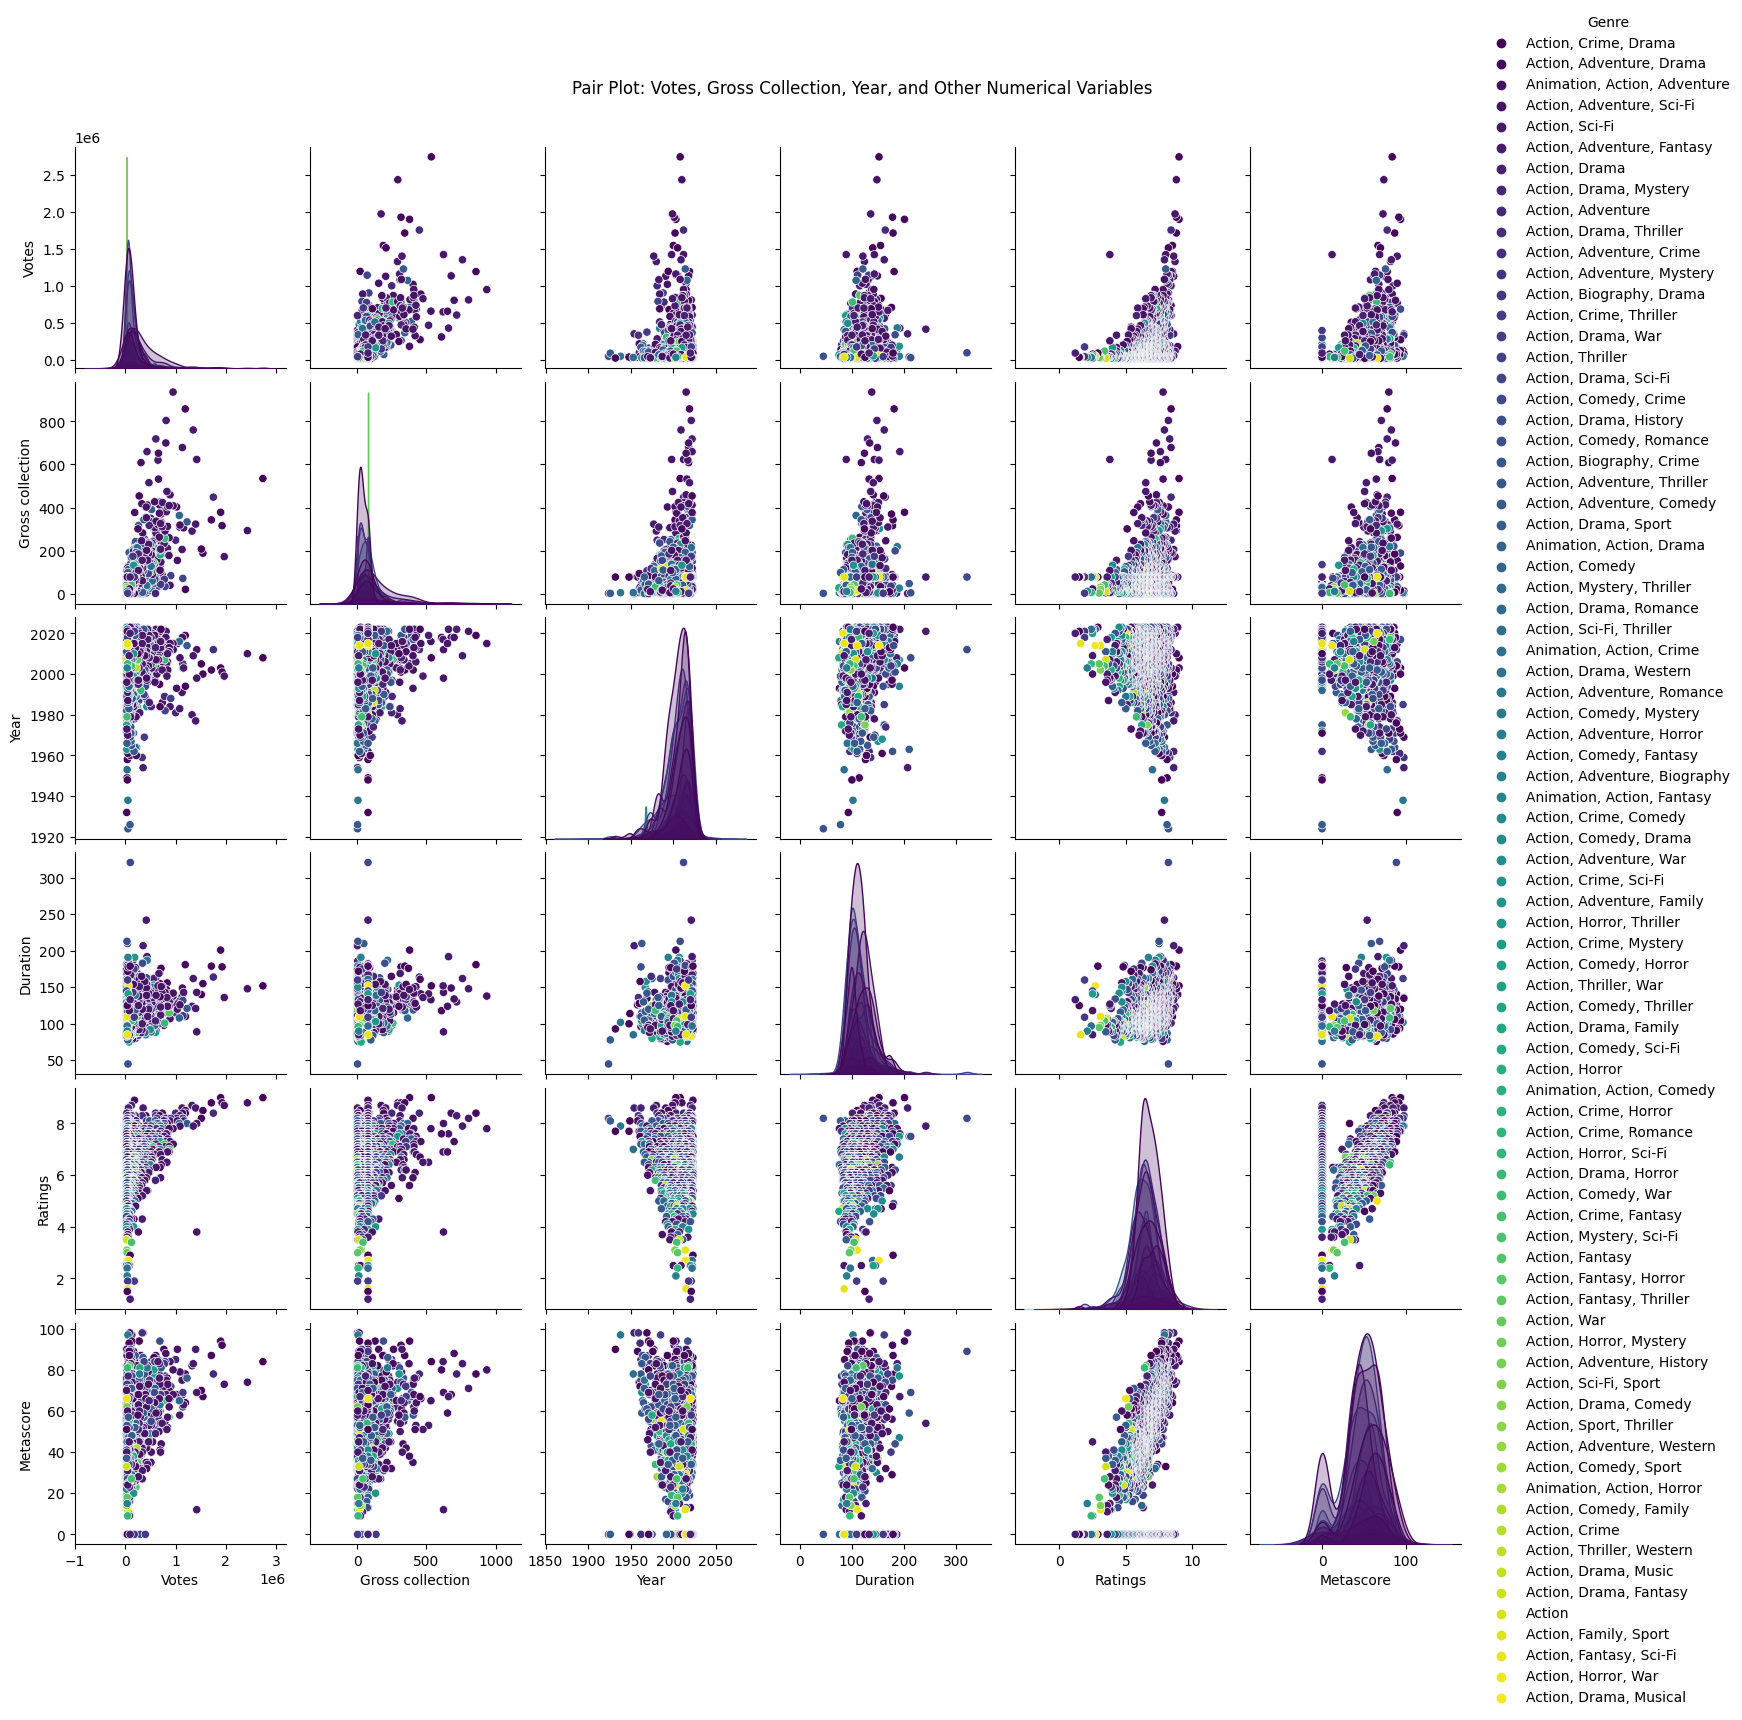

In [33]:
# Multivariate Analysis for 'Votes', 'Gross collection', 'Year', and other numerical variables
# Scatter Plot Matrix (Pair Plot)
sns.pairplot(joined_df, vars=['Votes', 'Gross collection', 'Year', 'Duration', 'Ratings', 'Metascore'],
             diag_kind='kde', hue='Genre', palette='viridis')
plt.suptitle('Pair Plot: Votes, Gross Collection, Year, and Other Numerical Variables', y=1.02)
plt.show()

This pair plot facilitates the exploration of relationships between multiple numerical variables, helping identify potential trends, correlations, and patterns within the dataset. It allows you to visually assess the interactions between the variables and how they may vary based on movie genres.

<Figure size 1000x800 with 0 Axes>

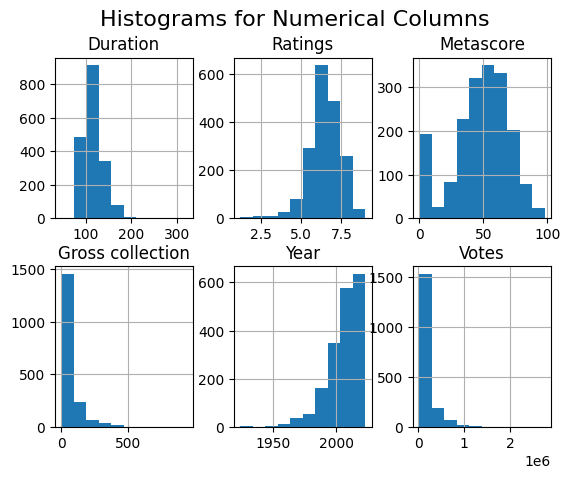

In [34]:
# Numerical columns to plot histograms
numeric_columns = ['Duration', 'Ratings', 'Metascore', 'Gross collection', 'Year', 'Votes']

# Plot histograms for numerical columns
plt.figure(figsize=(10, 8))
joined_df[numeric_columns].hist(layout=(2, 3))  # Layout (2, 3) means 2 rows and 3 columns
plt.suptitle('Histograms for Numerical Columns', fontsize=16)
plt.show()

In [35]:
# Calculate skewness and kurtosis for numerical columns
numeric_columns = ['Duration', 'Ratings', 'Metascore', 'Gross collection', 'Votes','Year']
for col in numeric_columns:
    skewness = joined_df[col].skew()
    kurtosis = joined_df[col].kurtosis()
    print(f"Skewness for {col}: {skewness}")
    print(f"Kurtosis for {col}: {kurtosis}")

Skewness for Duration: 1.4623211818164932
Kurtosis for Duration: 5.909716006901084
Skewness for Ratings: -0.7924559092985849
Kurtosis for Ratings: 2.3620155481311387
Skewness for Metascore: -0.6255379963162463
Kurtosis for Metascore: -0.016347053394096367
Skewness for Gross collection: 3.568641913025236
Kurtosis for Gross collection: 18.645095697621393
Skewness for Votes: 3.8178606830401547
Kurtosis for Votes: 22.691175113630365
Skewness for Year: -1.460844134786498
Kurtosis for Year: 3.249400806452773


Skewness measures the asymmetry of the data distribution, while kurtosis measures the peakedness or flatness of the distribution. A normal distribution has a skewness close to 0 and kurtosis close to 3. Positive skewness indicates a right-skewed distribution, and negative skewness indicates a left-skewed distribution.

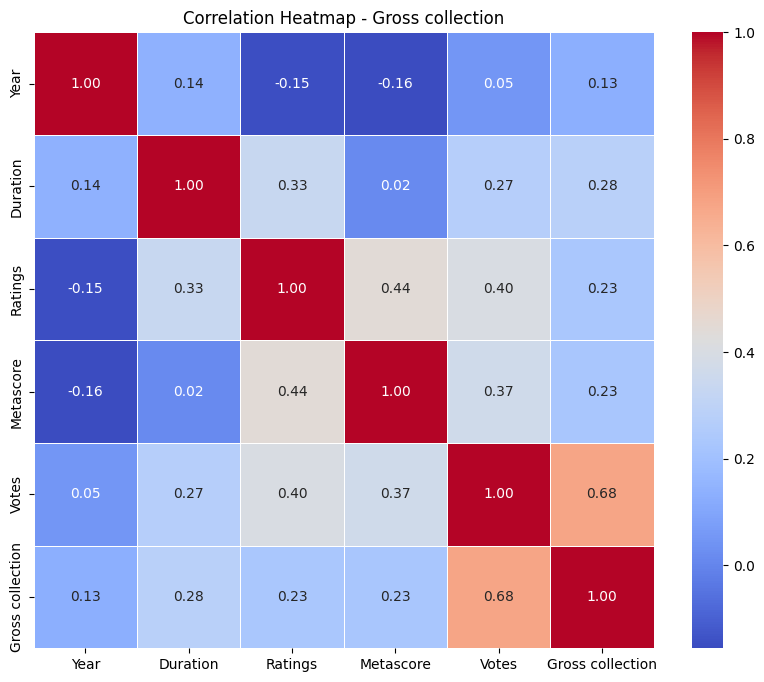

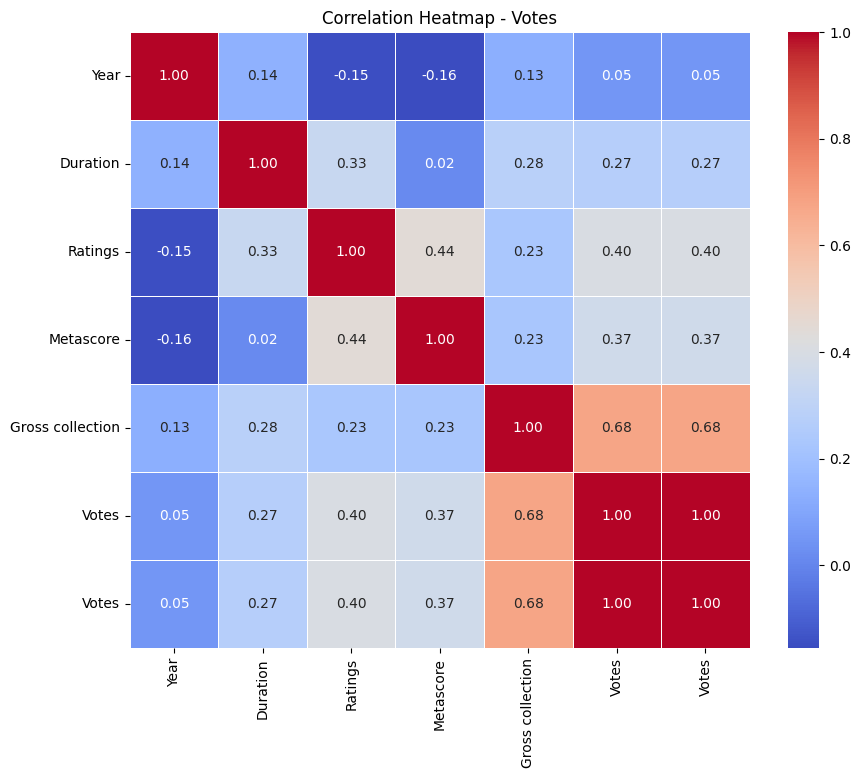

In [37]:
# Visualizing the correlation between labels and features

# Calculate correlation matrix for 'Gross collection'
numeric_columns_gross_collection = ['Year', 'Duration', 'Ratings', 'Metascore', 'Stars', 'Votes']
correlation_matrix_gross_collection = joined_df[numeric_columns_gross_collection + ['Gross collection']].corr()

# Calculate correlation matrix for 'Votes'
numeric_columns_votes = ['Year', 'Duration', 'Ratings', 'Metascore', 'Gross collection', 'Stars', 'Votes']
correlation_matrix_votes = joined_df[numeric_columns_votes + ['Votes']].corr()

# Plot heatmap for 'Gross collection' correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_gross_collection, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Gross collection')
plt.show()

# Plot heatmap for 'Votes' correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_votes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Votes')
plt.show()

both heatmaps provide a visual representation of the correlations between the target labels ('Gross collection' and 'Votes') and the specified numerical features. These visualizations help identify which features might be more influential in predicting the labels and provide insights into potential relationships within the dataset.

In [40]:
# Separate the features and labels

# Feature Selection for 'Gross collection'
features_gross_collection = joined_df[['Year', 'Duration', 'Ratings', 'Metascore']]
target_gross_collection = joined_df['Gross collection']

# Feature Selection for 'Votes'
features_votes = joined_df[['Year', 'Duration', 'Ratings', 'Metascore', 'Gross collection']]
target_votes = joined_df['Votes']

the code segment separates the dataset into two sets of features and corresponding target labels, tailored for predicting 'Gross collection' and 'Votes'. The choice of features is significant as it determines the information that the models will utilize to make predictions.

In [41]:
# feature Scaling

from sklearn.preprocessing import StandardScaler

# Feature Scaling using StandardScaler for 'Gross collection' features
scaler_gross_collection = StandardScaler()
X_gross_collection_scaled = scaler_gross_collection.fit_transform(features_gross_collection)

# Feature Scaling using StandardScaler for 'Votes' features
scaler_votes = StandardScaler()
X_votes_scaled = scaler_votes.fit_transform(features_votes)

feature scaling is crucial to ensure that the features are treated fairly and consistently by machine learning algorithms. The scaled features will be used as inputs for model training, enhancing the performance and convergence of the algorithms.

In [42]:
# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns (excluding the target variables and 'Stars')
numeric_columns = ['Year', 'Duration', 'Ratings', 'Metascore']
numeric_features = joined_df[numeric_columns]

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data['Features'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

print(vif_data)

    Features        VIF
0       Year  53.990471
1   Duration  34.338033
2    Ratings  60.825325
3  Metascore   7.031140


 the VIF calculation helps identify potential multicollinearity issues among the selected numeric features. High VIF values could suggest that some features are strongly correlated, which might impact the stability and interpretability of regression models. Further actions, such as feature transformation, selection, or regularization, may be considered to address multicollinearity if necessary

In [43]:
# Separate features and labels
features = joined_df.drop(['Gross collection', 'Votes'], axis=1)  # Features excluding 'Gross collection' and 'Votes'
gross_collection_labels = joined_df['Gross collection']  # 'Gross collection' as the label
votes_labels = joined_df['Votes']  # 'Votes' as the label

# Check value counts of the labels
print("Value counts of 'Gross collection':")
print(gross_collection_labels.value_counts())

print("\nValue counts of 'Votes':")
print(votes_labels.value_counts())

# Check value counts of the features (for each column)
for column in features.columns:
    print(f"\nValue counts of '{column}':")
    print(features[column].value_counts())

Value counts of 'Gross collection':
76.79104     299
0.03000        8
0.01000        7
0.04000        5
0.05000        5
            ... 
144.53000      1
426.83000      1
1.36000        1
1.98000        1
1.69000        1
Name: Gross collection, Length: 1362, dtype: int64

Value counts of 'Votes':
51009     2
57240     2
182513    2
98892     2
220511    2
         ..
349114    1
144136    1
246196    1
127414    1
96349     1
Name: Votes, Length: 1760, dtype: int64

Value counts of 'Serial No.':
1,647.    2
550.      2
385.      2
606.      2
181.      2
         ..
598.      1
597.      1
596.      1
595.      1
1,769.    1
Name: Serial No., Length: 1769, dtype: int64

Value counts of 'Movie Name':
Rollerball                  4
War                         4
Mortal Kombat               4
RoboCop                     4
Red Dawn                    4
                           ..
Pacific Rim                 1
Con Air                     1
Clear and Present Danger    1
Iron Man 2         

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [44]:
from sklearn.model_selection import train_test_split

# Create the train-test split for 'Gross collection'
X_gross_collection_train, X_gross_collection_test, y_gross_collection_train, y_gross_collection_test = train_test_split(
    features, gross_collection_labels, test_size=0.2, random_state=42)

# Create the train-test split for 'Votes'
X_votes_train, X_votes_test, y_votes_train, y_votes_test = train_test_split(
    features, votes_labels, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Shape of X_gross_collection_train:", X_gross_collection_train.shape)
print("Shape of X_gross_collection_test:", X_gross_collection_test.shape)
print("Shape of y_gross_collection_train:", y_gross_collection_train.shape)
print("Shape of y_gross_collection_test:", y_gross_collection_test.shape)

print("Shape of X_votes_train:", X_votes_train.shape)
print("Shape of X_votes_test:", X_votes_test.shape)
print("Shape of y_votes_train:", y_votes_train.shape)
print("Shape of y_votes_test:", y_votes_test.shape)

Shape of X_gross_collection_train: (1469, 9)
Shape of X_gross_collection_test: (368, 9)
Shape of y_gross_collection_train: (1469,)
Shape of y_gross_collection_test: (368,)
Shape of X_votes_train: (1469, 9)
Shape of X_votes_test: (368, 9)
Shape of y_votes_train: (1469,)
Shape of y_votes_test: (368,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Initialize models
linear_regression_model = LinearRegression()
random_forest_regression_model = RandomForestRegressor()
logistic_regression_model = LogisticRegression()
random_forest_classifier_model = RandomForestClassifier()

# Train the models
linear_regression_model.fit(X_gross_collection_train, y_gross_collection_train)
random_forest_regression_model.fit(X_gross_collection_train, y_gross_collection_train)
logistic_regression_model.fit(X_votes_train, y_votes_train)
random_forest_classifier_model.fit(X_votes_train, y_votes_train)

# Make predictions on the test data
gross_collection_predictions_linear = linear_regression_model.predict(X_gross_collection_test)
gross_collection_predictions_rf = random_forest_regression_model.predict(X_gross_collection_test)
votes_predictions_logistic = logistic_regression_model.predict(X_votes_test)
votes_predictions_rf = random_forest_classifier_model.predict(X_votes_test)

# Evaluate the models
gross_collection_mse_linear = mean_squared_error(y_gross_collection_test, gross_collection_predictions_linear)
gross_collection_mse_rf = mean_squared_error(y_gross_collection_test, gross_collection_predictions_rf)
votes_accuracy_logistic = accuracy_score(y_votes_test, votes_predictions_logistic)
votes_accuracy_rf = accuracy_score(y_votes_test, votes_predictions_rf)

# Print the evaluation results
print("Gross Collection Prediction - Linear Regression MSE:", gross_collection_mse_linear)
print("Gross Collection Prediction - Random Forest Regression MSE:", gross_collection_mse_rf)
print("Votes Prediction - Logistic Regression Accuracy:", votes_accuracy_logistic)
print("Votes Prediction - Random Forest Classifier Accuracy:", votes_accuracy_rf)

This code snippet provides a comprehensive example of training and evaluating machine learning models for the given tasks. It demonstrates how different algorithms can be applied and assessed for different prediction tasks.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models
linear_regression_model = LinearRegression()
random_forest_regression_model = RandomForestRegressor()
logistic_regression_model = LogisticRegression()
random_forest_classifier_model = RandomForestClassifier()

# Dictionary to store the models and their corresponding names
models = {
    'Linear Regression': linear_regression_model,
    'Random Forest Regression': random_forest_regression_model,
    'Logistic Regression': logistic_regression_model,
    'Random Forest Classifier': random_forest_classifier_model
}

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    cross_val_scores_gross_collection = cross_val_score(model, features, gross_collection_labels, cv=5, scoring='r2')
    mean_cross_val_score_gross_collection = cross_val_scores_gross_collection.mean()

    cross_val_scores_votes = cross_val_score(model, features, votes_labels, cv=5, scoring='r2')
    mean_cross_val_score_votes = cross_val_scores_votes.mean()

    print(f'Mean Cross-Validation Score for {model_name} - Gross Collection Prediction: {mean_cross_val_score_gross_collection:.2f}')
    print(f'Mean Cross-Validation Score for {model_name} - Votes Prediction: {mean_cross_val_score_votes:.2f}')
    print('----------------------------------------------')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Initialize and tune models
param_grid = {
    # Define hyperparameters for tuning
}
rf_classifier_gross_collection = RandomForestClassifier()
rf_classifier_votes = RandomForestClassifier()

grid_search_gross_collection = GridSearchCV(rf_classifier_gross_collection, param_grid, cv=5)
grid_search_votes = GridSearchCV(rf_classifier_votes, param_grid, cv=5)

grid_search_gross_collection.fit(X_gross_collection_train, y_gross_collection_train)
grid_search_votes.fit(X_votes_train, y_votes_train)

# Get the best models after tuning
best_model_gross_collection = grid_search_gross_collection.best_estimator_
best_model_votes = grid_search_votes.best_estimator_

# Predict probabilities for ROC curve
gross_collection_probs = best_model_gross_collection.predict_proba(X_gross_collection_test)[:, 1]
votes_probs = best_model_votes.predict_proba(X_votes_test)[:, 1]

# Calculate AUC for ROC curve
gross_collection_auc = roc_auc_score(y_gross_collection_test, gross_collection_probs)
votes_auc = roc_auc_score(y_votes_test, votes_probs)

# Plot the ROC curve
fpr_gross_collection, tpr_gross_collection, _ = roc_curve(y_gross_collection_test, gross_collection_probs)
fpr_votes, tpr_votes, _ = roc_curve(y_votes_test, votes_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gross_collection, tpr_gross_collection, label=f'Gross Collection (AUC = {gross_collection_auc:.2f})')
plt.plot(fpr_votes, tpr_votes, label=f'Votes (AUC = {votes_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The code showcases how to tune hyperparameters of RandomForestClassifier models using GridSearchCV.
ROC curves help visualize the models' trade-offs between true positive rate and false positive rate.
AUC values provide a single scalar measure of the model's overall discriminatory power.
The final plot visually compares the ROC curves and AUC values for 'Gross collection' and 'Votes' predictions.

In [ ]:
# Save the trained models to files
joblib.dump(random_forest_regression_model, 'random_forest_regression_model.pkl')
joblib.dump(random_forest_classifier_model, 'random_forest_classifier_model.pkl')